In [31]:
import numpy as np
import gym
from hiive.mdptoolbox import mdp
import matplotlib.pyplot as plt


# Helper functions


credit https://github.com/wesley-smith/CS7641-assignment-4/blob/f3d86e37504dda563f65b3267610a30f09d01c77/helpers.py

credit https://github.com/adodd202/GT-ML-Assignment4/blob/main/Frozen%20Lake%20Analysis.ipynb

credit https://github.com/luclement/ml-assignment4/blob/master/frozen_lake.ipynb


In [65]:
import random

# Set a seed for reproducibility
random.seed(21)

# Generate 20 random numbers between 2 and 397
random_numbers = [random.randint(2, 62) for _ in range(8)]

print(random_numbers)


[12, 28, 46, 28, 42, 20, 32, 55]


In [67]:
# Unpacked from gym.unwrapped.P is a list of states. Each state has a dictionary [0,1,2,3]. Each dictionary
# contains a 4 part tuple [probability,new_state,reward,finished]
def getRewardProb(env, sz):
    sz = int(sz**2)
    r = np.zeros((4,sz,sz))
    p = np.zeros((4,sz,sz))
    envP = env.unwrapped.P
    for state in envP:
        for action in envP[state]:
            transitions = envP[state][action]
            for t_idx in range((len(transitions))):
                new_state = transitions[t_idx][1]
                trans_prob = transitions[t_idx][0]
                reward = transitions[t_idx][2]
                p[action][state][new_state] += trans_prob
                r[action][state][new_state] += reward
            p[action,state,:] /= np.sum(p[action,state,:])
    return r, p

In [68]:
# Citation: https://github.com/udacity/deep-reinforcement-learning/blob/b23879aad656b653753c95213ebf1ac111c1d2a6/dynamic-programming/plot_utils.py
def plot_values(V, P, dim, holes = random_numbers):
    # reshape value function
    V = list(V)
    for i in holes:
        V[i] = -0.2
    V_sq = np.reshape(V, (dim, dim))
    P_sq = np.reshape(P, (dim, dim))
    # plot the state-value function
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    im = ax.imshow(V_sq, cmap='cool')
    if dim < 10:
        fontSize = 20
    else:
        fontSize = 10

    for (j, i), label in np.ndenumerate(V_sq):
        ax.text(i, j, np.round(label, 2), ha='center', va='top', fontsize=fontSize)
        # LEFT = 0
        # DOWN = 1
        # RIGHT = 2
        # UP = 3
        if np.round(label, 3) > -0.09  and P_sq[j][i] == 0:
            ax.text(i, j, 'LEFT', ha='center', va='bottom', fontsize=fontSize)
        elif np.round(label, 2) > -0.09  and P_sq[j][i] == 1:
            ax.text(i, j, 'DOWN', ha='center', va='bottom', fontsize=fontSize)
        elif np.round(label, 2) > -0.09  and P_sq[j][i] == 2:
            ax.text(i, j, 'RIGHT', ha='center', va='bottom', fontsize=fontSize)
        elif np.round(label, 2) > -0.09  and P_sq[j][i] == 3:
            ax.text(i, j, 'UP', ha='center', va='bottom', fontsize=fontSize)

    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.title('State-Value Function')
    fig.tight_layout()
    plt.savefig('Images\\VI-FL-Plot_vals' + str(dim) + '.png')
    plt.show()

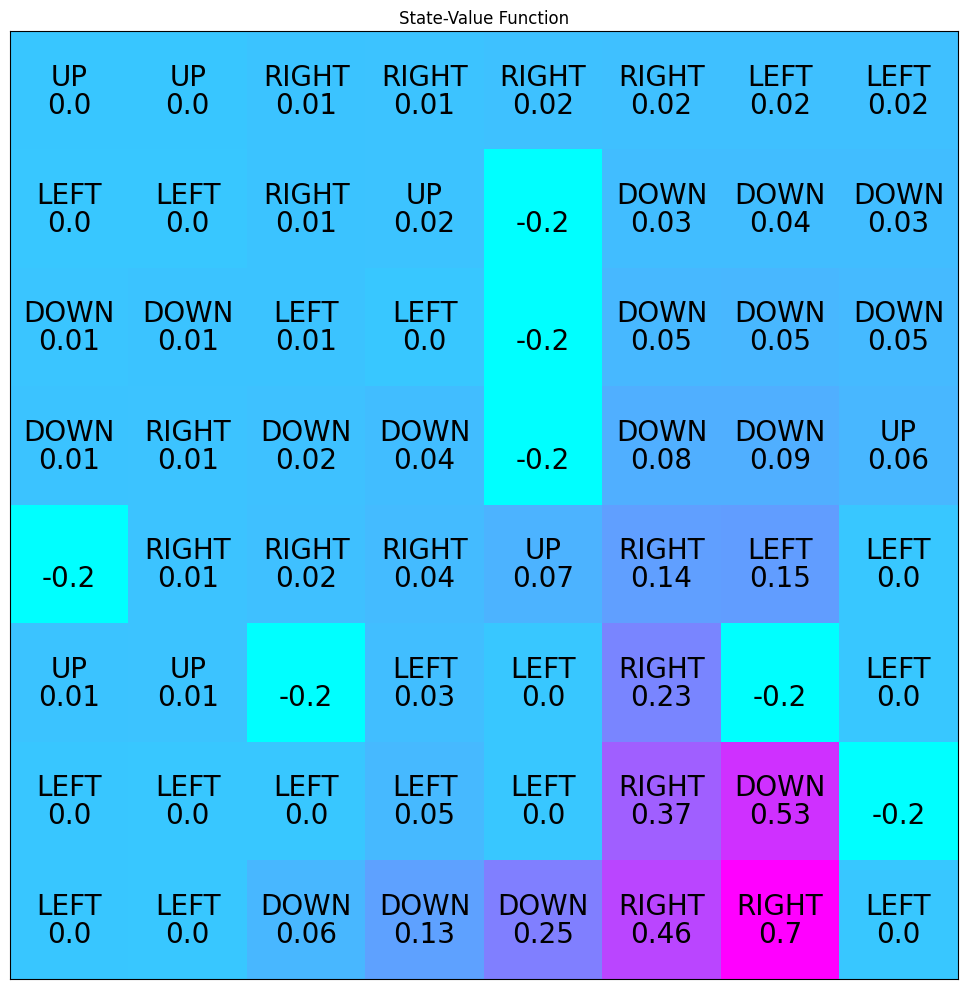

In [69]:
import random
from gym.envs.toy_text.frozen_lake import generate_random_map

s = 8
opt = "{}x{}".format(s,s)
sz = (s,s)
seed_val = 58
np.random.seed(seed_val)
random.seed(seed_val)
dim = s
random_map = generate_random_map(size=dim, p=0.8)
env = gym.make("FrozenLake-v1", desc=random_map)
env.reset(seed=seed_val)
r, p = getRewardProb(env, s)
vi = mdp.ValueIteration(p, r, 0.9, max_iter=10000)
vi.run()
plot_values(vi.V, vi.policy, 8)

In [70]:
def valueIterateGraph(p, r, value_iterate=True):
    max_vs = []
    mean_vs = []
    errors = []
    rewards = []
    iterations = []
    times = []
    gammas = list(np.arange(0.5,1,0.04))
    print(gammas)
    for gamma in gammas:
        if value_iterate:
            vi = mdp.ValueIteration(p, r, gamma)
        else:
            vi = mdp.PolicyIteration(p, r, gamma, max_iter=50)
        vi.run()
        vi.run_stats
        iterations.append(list(range(1,len(vi.run_stats)+1)))
        max_vs.append([el['Max V'] for el in vi.run_stats])
        mean_vs.append([el['Mean V'] for el in vi.run_stats])
        errors.append([el['Error'] for el in vi.run_stats])
        rewards.append([el['Reward'] for el in vi.run_stats])
        times.append([el['Time'] for el in vi.run_stats])
    
    f, ax = plt.subplots(1,4, figsize=(16,4))
    titles = ["Max V", "Max V", "Error", "Time"]
    for j in range(4):
        ax[j].set_title(titles[j], fontsize=16)
        for i in range(len(max_vs)):
            ax[0].plot(iterations[i], max_vs[i], alpha=1, label="Gamma: {}".format(np.round(gammas[i],3)))
        ax[j].legend()
        ax[j].set_xlabel("# Iterations")

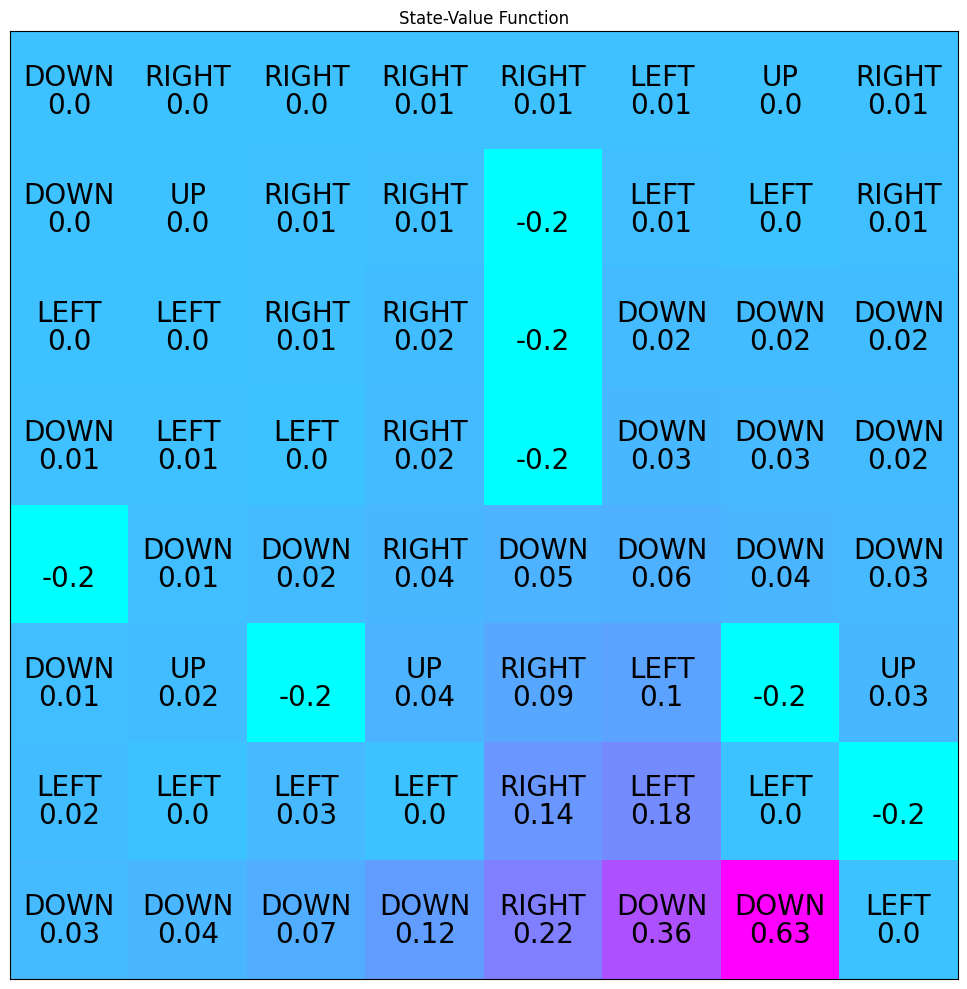

[0.5, 0.54, 0.5800000000000001, 0.6200000000000001, 0.6600000000000001, 0.7000000000000002, 0.7400000000000002, 0.7800000000000002, 0.8200000000000003, 0.8600000000000003, 0.9000000000000004, 0.9400000000000004, 0.9800000000000004]
0.42896413803100586


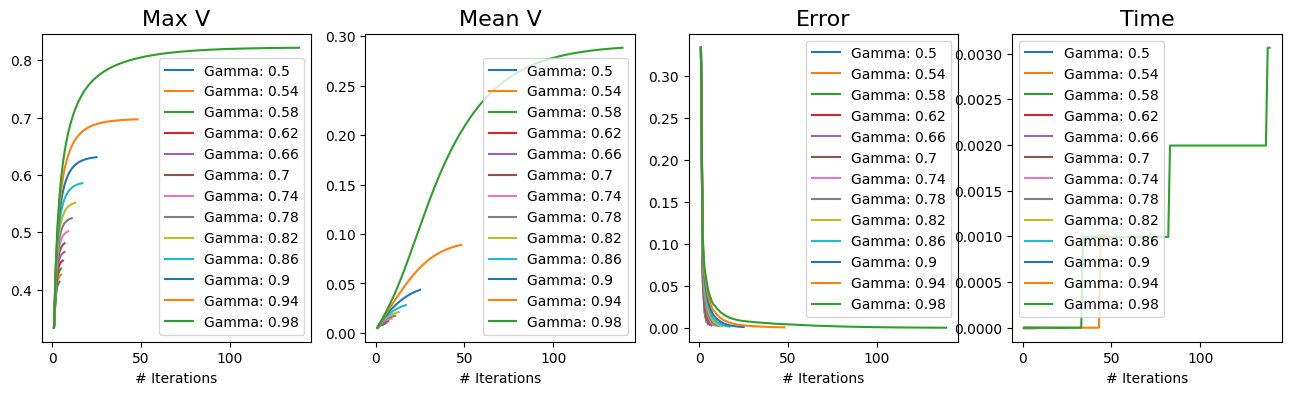

In [71]:
from time import time

dim = 8
random_map = generate_random_map(size=dim, p=0.9)
env = gym.make("FrozenLake-v1", desc=random_map)
env.reset(seed=seed_val)
r, p = getRewardProb(env, s)
tic = time()
vi = mdp.ValueIteration(p, r, 0.98, max_iter=10000)
vi.run()
plot_values(vi.V, vi.policy, 8)
valueIterateGraph(p, r)
print(time()-tic)

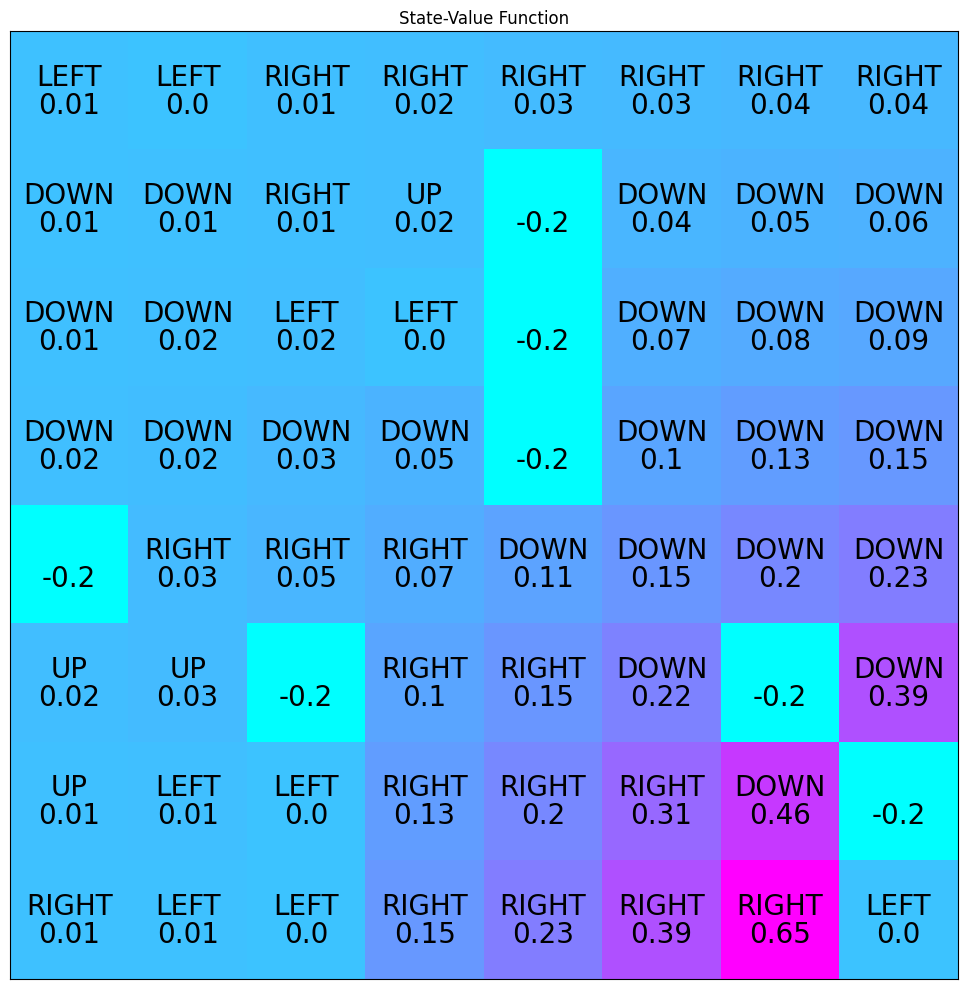

[0.5, 0.54, 0.5800000000000001, 0.6200000000000001, 0.6600000000000001, 0.7000000000000002, 0.7400000000000002, 0.7800000000000002, 0.8200000000000003, 0.8600000000000003, 0.9000000000000004, 0.9400000000000004, 0.9800000000000004]
3.056436061859131


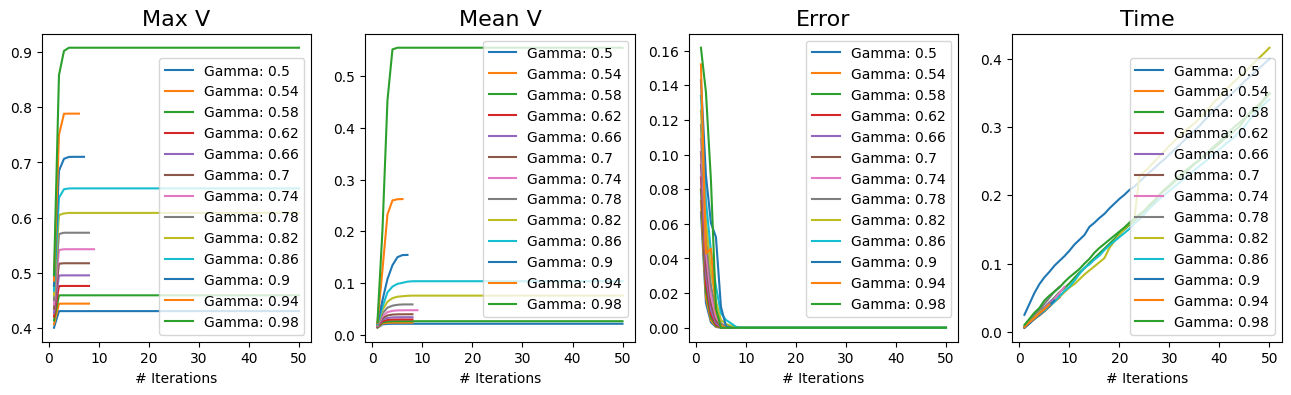

In [73]:
from time import time

dim = 8
random_map = generate_random_map(size=dim, p=0.9)
env = gym.make("FrozenLake-v1", desc=random_map)
env.reset(seed=seed_val)
r, p = getRewardProb(env, s)
tic = time()
vi = mdp.PolicyIteration(p, r, 0.86, max_iter=50)
vi.run()
plot_values(vi.V, vi.policy, 8)
valueIterateGraph(p, r, False)
print(time()-tic)

In [89]:
def QLearnGraphGammas(p, r):
    max_vs = []
    mean_vs = []
    errors = []
    rewards = []
    iterations = []
    times = []
    gammas = [0.5, 0.6, 0.9, 0.95, 0.99, 0.999]
    for gamma in gammas:
        vi = mdp.QLearning(p, r, gamma=gamma, alpha=0.1, alpha_decay=0.99999, epsilon=1, epsilon_decay=0.9999, n_iter=1000000)
        vi.run()
        vi.run_stats
        iterations.append(list(range(1,len(vi.run_stats)+1)))
        max_vs.append([el['Max V'] for el in vi.run_stats])
        mean_vs.append([el['Mean V'] for el in vi.run_stats])
        errors.append([el['Error'] for el in vi.run_stats])
        rewards.append([el['Reward'] for el in vi.run_stats])
        times.append([el['Time'] for el in vi.run_stats])
    
    f, ax = plt.subplots(1,4, figsize=(16,4))
    titles = ["Max V", "Max V", "Error", "Time"]
    values = [max_vs, mean_vs, errors, times]
    for j in range(4):
        ax[j].set_title(titles[j], fontsize=16)
        for i in range(len(values[j])):
            ax[j].plot(iterations[i], values[j][i], alpha=1,  label="Gamma: {}".format(np.round(gammas[i],3)))
        ax[j].legend()
        ax[j].set_xlabel("# Iterations")
    
def QLearnGraphEpsilons(p, r):
    max_vs = []
    mean_vs = []
    errors = []
    rewards = []
    iterations = []
    times = []
    epsilons = [0, 0.3, 0.6, 0.8, 1]
    for epsilon in epsilons:
        vi = mdp.QLearning(p, r, gamma=0.999, alpha=0.1, alpha_decay=0.99999, epsilon=epsilon, epsilon_decay=0.9999, n_iter=1000000)
        vi.run()
        vi.run_stats
        iterations.append(list(range(1,len(vi.run_stats)+1)))
        max_vs.append([el['Max V'] for el in vi.run_stats])
        mean_vs.append([el['Mean V'] for el in vi.run_stats])
        errors.append([el['Error'] for el in vi.run_stats])
        rewards.append([el['Reward'] for el in vi.run_stats])
        times.append([el['Time'] for el in vi.run_stats])
        
    f, ax = plt.subplots(1,4, figsize=(16,4))
    titles = ["Max V", "Mean V", "Error", "Time"]
    values = [max_vs, mean_vs, errors, times]
    for j in range(4):
        ax[j].set_title(titles[j], fontsize=16)
        for i in range(len(values[j])):
            ax[j].plot(iterations[i], values[j][i], alpha=1, label="Epsilon: {}".format(np.round(epsilons[i],3)))
        ax[j].legend()
        ax[j].set_xlabel("# Iterations") 

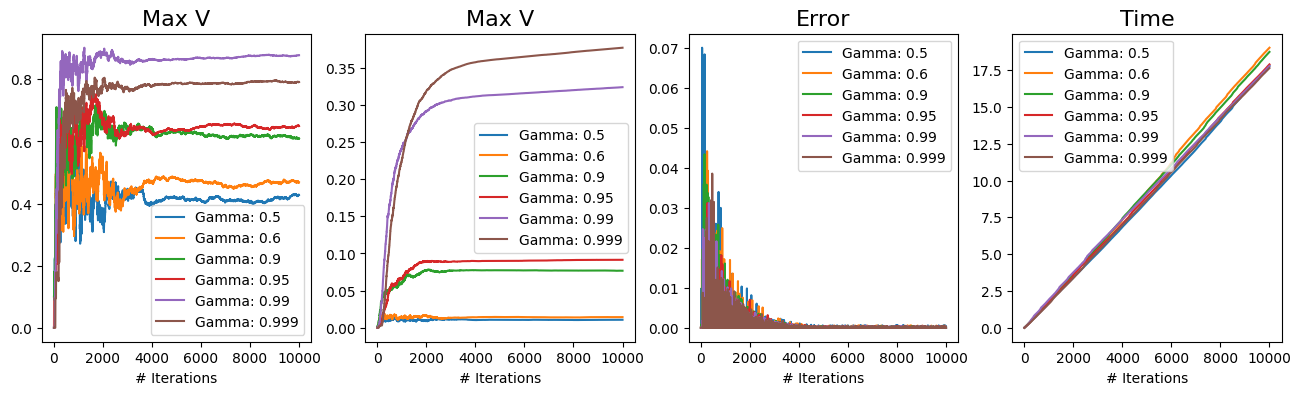

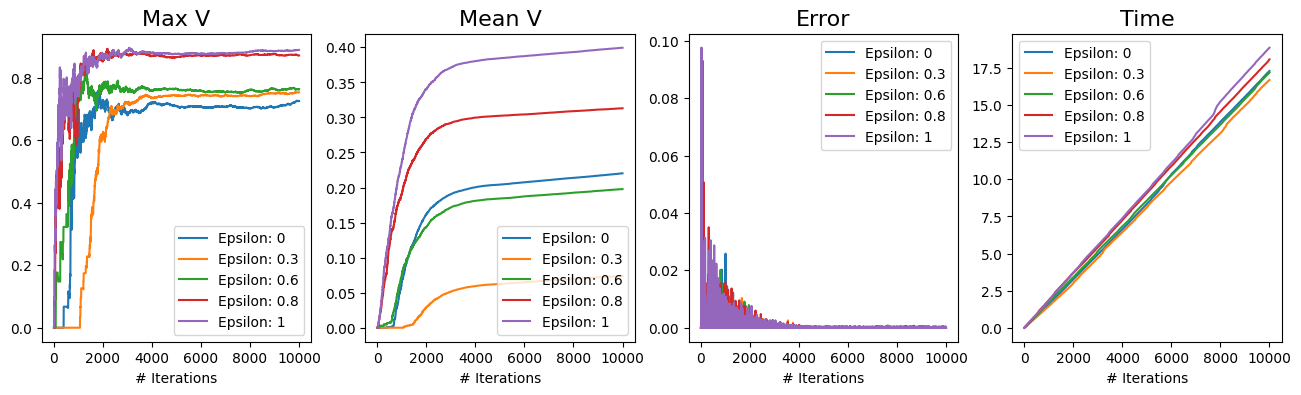

In [90]:
dim = 8
random_map = generate_random_map(size=dim, p=0.9)
env = gym.make("FrozenLake-v1", desc=random_map)
env.reset(seed=seed_val)
r, p = getRewardProb(env, dim)
QLearnGraphGammas(p, r)
QLearnGraphEpsilons(p, r)

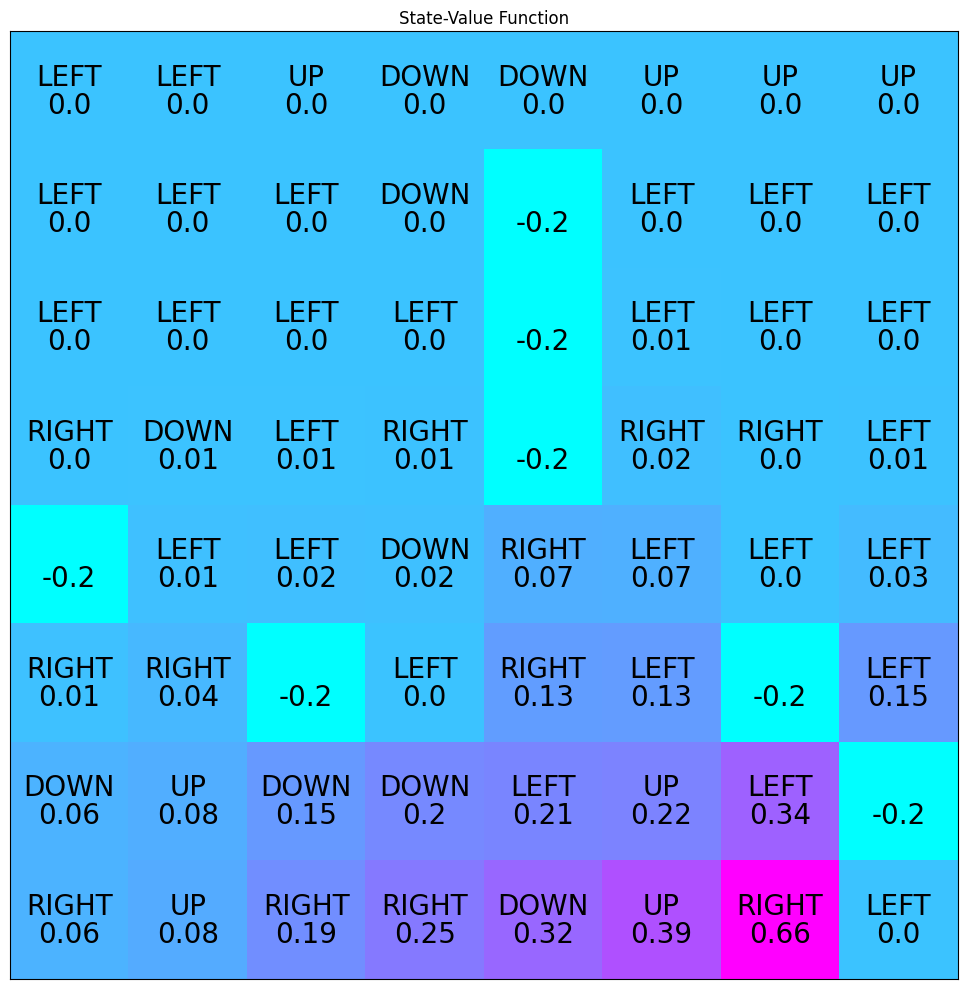

In [88]:
vi = mdp.QLearning(p, r, gamma=0.999, alpha=0.1, alpha_decay=0.99999, epsilon=1, epsilon_decay=0.9999, n_iter=1000000)
vi.run()
plot_values(vi.V, vi.policy, 8)
